In [7]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('\\Users\\Peter\\Desktop\\Final Countdown\\merged_file_with_slugging.csv')

df.head()

,Date,Time,temp,dwpt,rhum,wdir,wspd,pres,Visitor,Home,...,Elevation,Team,Opponent,At Bats,Singles,Doubles,Triples,Home Runs,Total Bases,Slugging Percentage
0,2013-03-31,19:00,80.60,18.0,58.0,200.0,18.4,1012.7,TEX,HOU,...,6,Houston Astros,Texas Rangers,32,6,0,2,1,16,0.50
1,2013-03-31,19:00,80.60,18.0,58.0,200.0,18.4,1012.7,TEX,HOU,...,6,Texas Rangers,Houston Astros,32,6,0,0,0,6,0.19
2,2013-04-01,19:00,60.08,2.7,42.0,300.0,29.5,1007.7,MIA,WAS,...,2,Washington Nationals,Miami Marlins,26,3,0,0,2,11,0.42
3,2013-04-01,19:00,60.08,2.7,42.0,300.0,29.5,1007.7,MIA,WAS,...,2,Miami Marlins,Washington Nationals,29,2,1,0,0,4,0.14
4,2013-04-01,19:00,60.98,5.1,48.0,270.0,33.5,1002.7,SDN,NYN,...,4,New York Yankees,Boston Red Sox,33,5,1,0,0,7,0.21


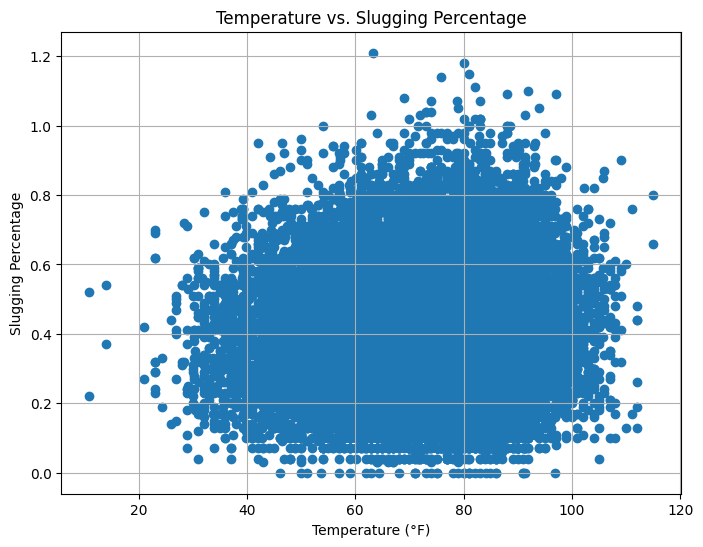

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temp'], df['Slugging Percentage'])
plt.title('Temperature vs. Slugging Percentage')
plt.xlabel('Temperature (°F)')
plt.ylabel('Slugging Percentage')
plt.grid(True)
plt.show()

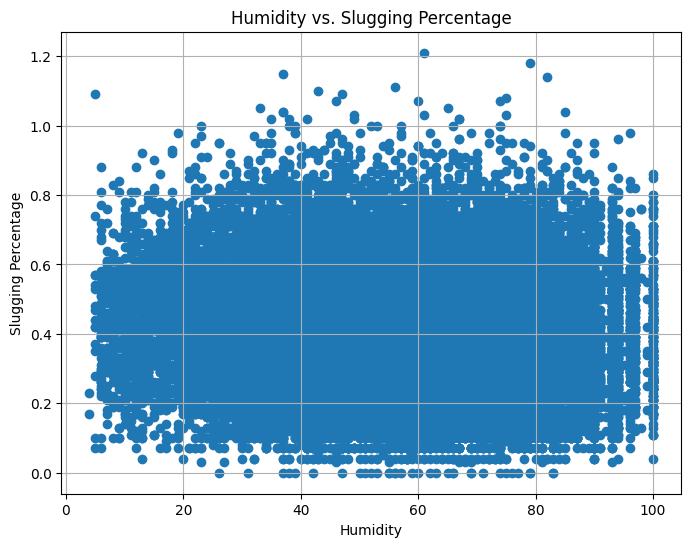

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['rhum'], df['Slugging Percentage'])
plt.title('Humidity vs. Slugging Percentage')
plt.xlabel('Humidity')
plt.ylabel('Slugging Percentage')
plt.grid(True)
plt.show()

C:\Users\Peter\AppData\Local\Temp\ipykernel_8420\2788261294.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Slugging Percentage', index='Wind Speed Bin', columns='Elevation Bin', aggfunc='mean')


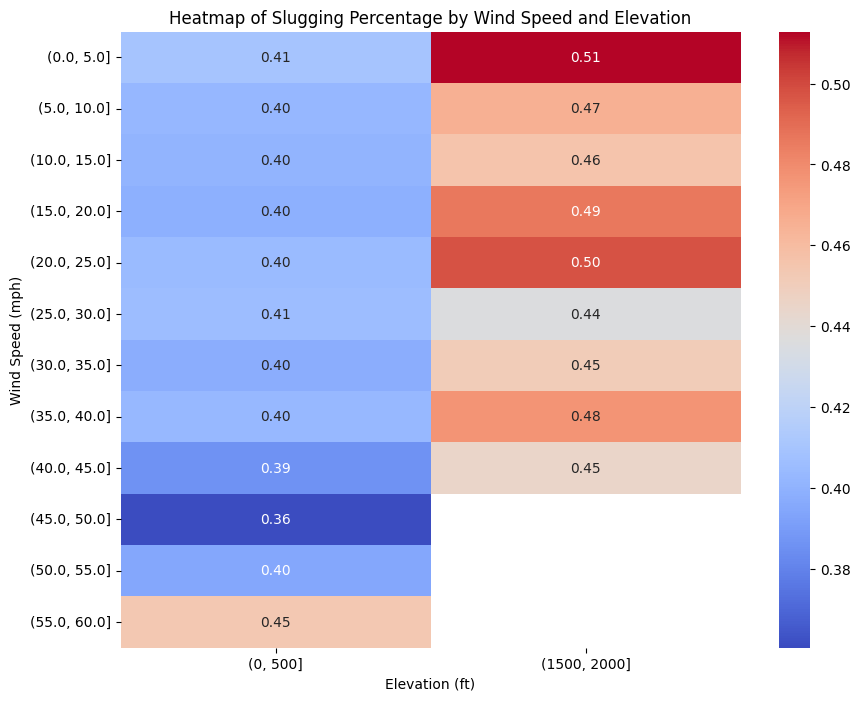

In [14]:

df['Wind Speed Bin'] = pd.cut(df['wspd'], bins=np.arange(0, df['wspd'].max() + 5, 5))
df['Elevation Bin'] = pd.cut(df['Elevation'], bins=np.arange(0, df['Elevation'].max() + 500, 500))

pivot_table = df.pivot_table(values='Slugging Percentage', index='Wind Speed Bin', columns='Elevation Bin', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Slugging Percentage by Wind Speed and Elevation')
plt.xlabel('Elevation (ft)')
plt.ylabel('Wind Speed (mph)')
plt.show()

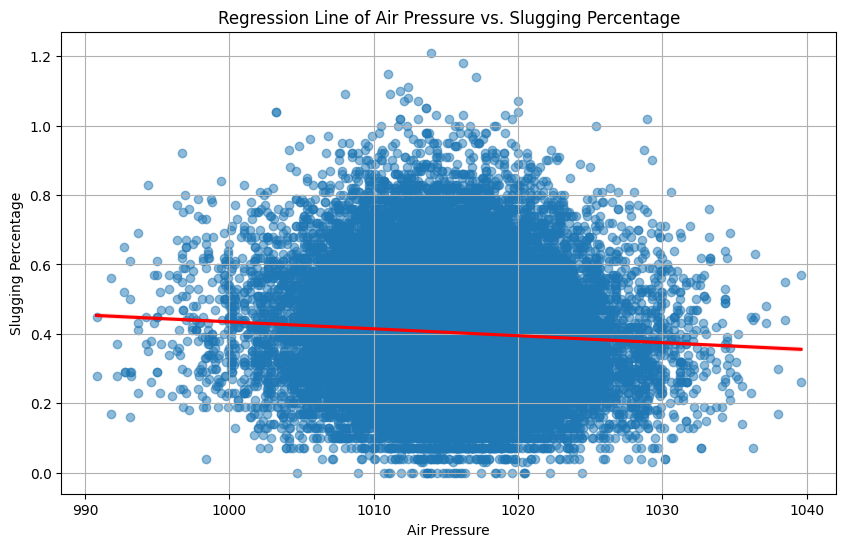

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x='pres', y='Slugging Percentage', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Line of Air Pressure vs. Slugging Percentage')
plt.xlabel('Air Pressure')
plt.ylabel('Slugging Percentage')
plt.grid(True)
plt.show()

C:\Users\Peter\AppData\Local\Temp\ipykernel_8420\182790413.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_slugging_by_hum = df.groupby('Humidity Range')['Slugging Percentage'].mean().reset_index()


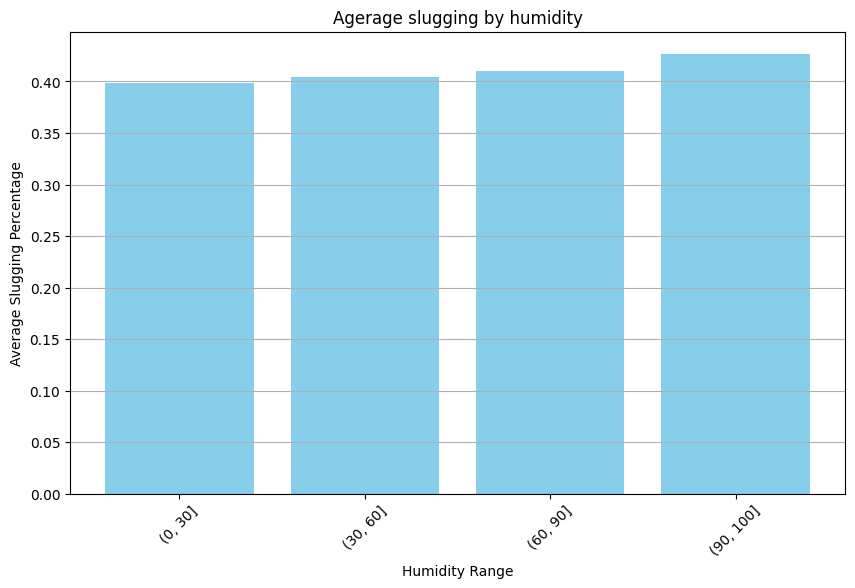

In [25]:

rhum_bins = [0, 30, 60, 90, 100] 
df['Humidity Range'] = pd.cut(df['rhum'], bins=rhum_bins)

avg_slugging_by_hum = df.groupby('Humidity Range')['Slugging Percentage'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_slugging_by_hum['Humidity Range'].astype(str), avg_slugging_by_temp['Slugging Percentage'], color='skyblue')
plt.title('Agerage slugging by humidity')
plt.xlabel('Humidity Range')
plt.ylabel('Average Slugging Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\Peter\AppData\Local\Temp\ipykernel_8420\2700279943.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_slugging_by_elevation = df.groupby('Elevation Range')['Slugging Percentage'].mean().reset_index()


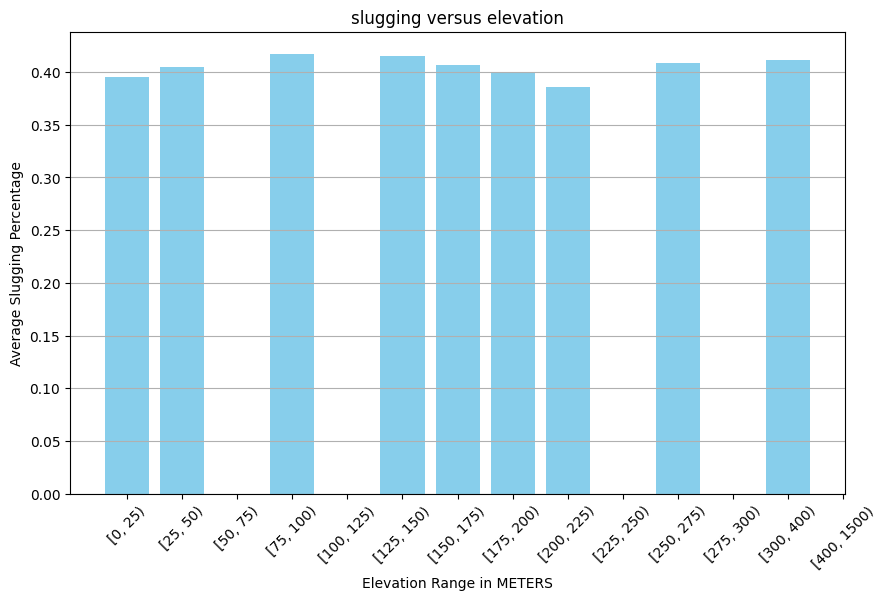

In [32]:

elevation_bin = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225,250,275,300, 400, 1500] 

df['Elevation Range'] = pd.cut(df['Elevation'], bins=elevation_bin,right=False)

avg_slugging_by_elevation = df.groupby('Elevation Range')['Slugging Percentage'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(avg_slugging_by_elevation['Elevation Range'].astype(str), avg_slugging_by_elevation['Slugging Percentage'], color='skyblue')
plt.title('slugging versus elevation')
plt.xlabel('Elevation Range in METERS')
plt.ylabel('Average Slugging Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

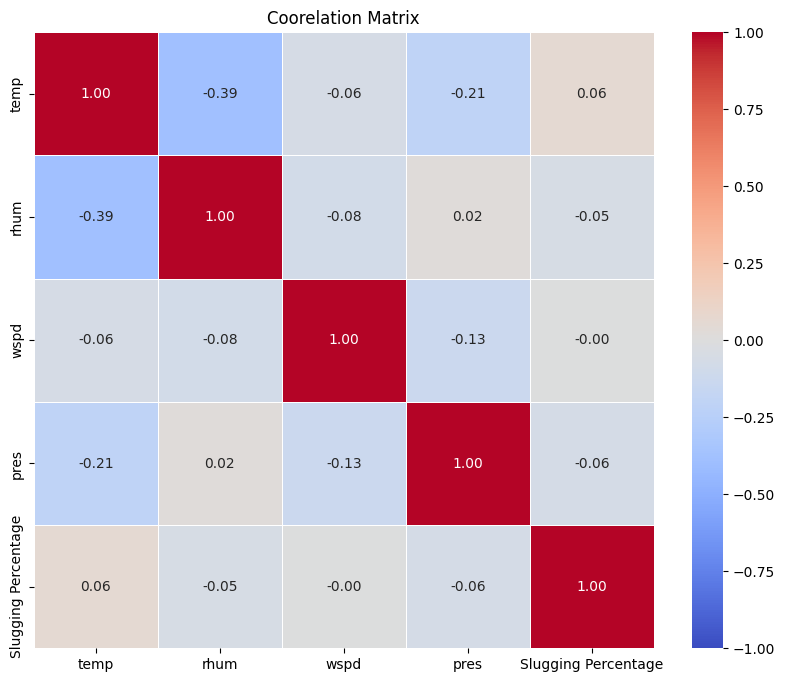

In [36]:
weather_slugging_df = df[['temp', 'rhum', 'wspd', 'pres', 'Slugging Percentage']]
correlation_matrix = weather_slugging_df.corr()

plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Coorelation Matrix')
plt.show()